## GMM

In [1]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs 

In [ ]:
## Geneartive algorithm
# basic of gans


In [2]:
### Create three cluster with std of 1.0 3.5 0.5 using make_blobs, with
### with a total of 1500 samples

X, y = make_blobs(n_samples = 1500, cluster_std = [1.0,3.5,0.5],random_state = 42)

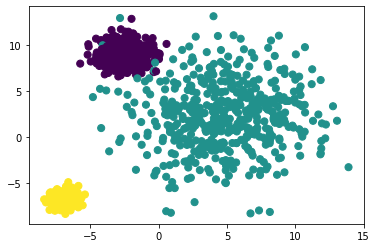

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [4]:
import numpy as np

# get m,n
m,n = X.shape

# define K
K = 3

# define max_iter
max_iter = 20

# initialization
### initializa r with fill values = 1/k --> (m,K)
r = np.full((m,K),1/K)
assert r.shape == (m,K)

### initialize pi with fill values = 1/K --> (K)
PI = np.full((K, ),1/K)

### initialize mean with random value from sample --> (n,K)
import random
# mean = np.zeros((n,K))
idx_ = np.arange(0,m)
random.shuffle(idx_)
idx_ = idx_[:K]
mean = np.array([X[idx,:] for idx in idx_ ]).T
# print(mean.shape)

# if i want k to be 3
# i want 3 sample values
#   egg gold stock 
# [  1    2    3
#    3    5    5
#    4    10   11
#    9    3    14]
# m = 4, n =3
# X[[1,3,4]] fancy indexing allows it
###### chaky's way ######
# random_row = np.random.randint(low=0,high = m, size = K)
# print(random_row)
# mean = np.array([X[idx] for idx in random_row]).T
# print(mean.shape)

# ## initializa cov using covariance of X ---> (K,n,n)
# cov = np.zeros((K,n,n))
# cov = np.array([np.cov(X.T)])
cov = np.full((K,n,n),np.cov(X.T)) # X to be transposed!! check API
assert cov.shape == (K,n,n)
##### chaky's way #####
# cov1 = np.array([np.cov(X.T) for _ in range (K)])
# print(cov1.shape)

In [5]:
for iteration in range(max_iter):
    
    #E-step
    #find r_ik of each sample
    for i in range(m):
        for k in range(K):
            #### compute the N using scipy.stats.multivariate_normal.pdf
# #             mean_k = np.mean(X[i,K]) #(n,K) -> mean[:,k]
# #             cov_k = np.full((K,n,n),np.cov(X[:,K].T) #(k,n,n) cov[k,:,:] = cov[k]            
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
#            #how likely does this xi belong to this probability            
            r[i, k] = PI[k] * xi_pdf
        r[i] /= np.sum(r[i])

    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0) #r=(m,k)
    assert NK.shape == (K, )    
    
    #PI
    pi = NK/m
    
    #mean    
    mean =  np.dot(X.T,r)/NK
    
    #covariance
    for k in range(K):
        for i in range(m):
            X_mean = (X[i] - mean[:,k]).reshape(-1,1)  #with the mean_k first
                    #(n, )- (n,k)
            cov[k] += r[i,k]* (X_mean @ X_mean.T)
        cov[k] /= NK[k]


[1 0 0 ... 1 0 1]


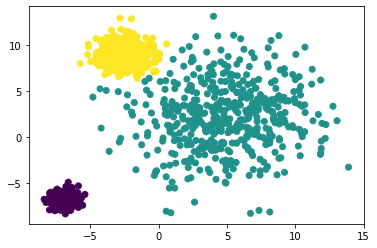

In [6]:
#how to get prediction?
# r shape (m,k)
yhat = np.argmax(r,axis = 1)
plt.scatter(X[:,0],X[:,1],c = yhat)
print(yhat)

In [7]:
# print the shape of X which has cluster 1
print(X[yhat==0].shape)
print(X[yhat==1].shape)
print(X[yhat==2].shape)

(500, 2)
(495, 2)
(505, 2)


In [8]:
print(np.unique(y))

[0 1 2]


In [12]:
print(cov[0])
print(cov[1])
print(cov[2])

[[0.24157416 0.01078455]
 [0.01078455 0.24481035]]
[499.9508752  499.24213101 500.80699379]
[[11.13747259  0.46767137]
 [ 0.46767137 13.08916885]]
[[ 0.93304849 -0.04449066]
 [-0.04449066  1.02661006]]


In [13]:
print(NK)

[499.9508752  499.24213101 500.80699379]
